In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

In [2]:
input_dim=784 #Mnist: 28x28 images -> input dimension = 784
hidden_dim=128 #width of the hidden layer
output_dim=10 #10 classes (the digits in mnist)

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
                
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [4]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [5]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return correct / len(test_loader.dataset)

In [6]:
batch_size = 100
test_batch_size= 1000
epochs = 14
lr = 0.1
gamma = 0.7
seed = 1
log_interval = 60
save_model=False

In [7]:
torch.manual_seed(seed)

device = "cpu" # "cuda"

train_kwargs = {'batch_size': batch_size}
test_kwargs = {'batch_size': test_batch_size}
if device == "cuda":
    cuda_kwargs = {'num_workers': 1,
                   'pin_memory': True,
                   'shuffle': True}

In [8]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.MNIST('../data', train=True, download=False,
                   transform=transform)
dataset2 = datasets.MNIST('../data', train=False, download=False,
                   transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

In [16]:
model = Net().to(device)

accs = []
for s in range(10):
    lr = 10 ** (-s)
    optimizer = optim.Adagrad(model.parameters(), lr=lr)
    scheduler = StepLR(optimizer, step_size=1, gamma=gamma)
    acc = []
    print(f"Training using the lr={lr}")
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch)
        a = test(model, device, test_loader)
        acc.append(a)
        scheduler.step()
    accs.append(acc)
    print("=" * 48)

Training using the lr=1
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.332632
Train Epoch: 1 [6000/60000 (10%)]	Loss: 1.646306
Train Epoch: 1 [12000/60000 (20%)]	Loss: 2.110842
Train Epoch: 1 [18000/60000 (30%)]	Loss: 2.413333
Train Epoch: 1 [24000/60000 (40%)]	Loss: 2.751018
Train Epoch: 1 [30000/60000 (50%)]	Loss: 2.203473
Train Epoch: 1 [36000/60000 (60%)]	Loss: 5.516228
Train Epoch: 1 [42000/60000 (70%)]	Loss: 1.235505
Train Epoch: 1 [48000/60000 (80%)]	Loss: 1.535488
Train Epoch: 1 [54000/60000 (90%)]	Loss: 1.541563

Test set: Average loss: 1.6199, Accuracy: 5246/10000 (52%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.155727
Train Epoch: 2 [6000/60000 (10%)]	Loss: 1.220756
Train Epoch: 2 [12000/60000 (20%)]	Loss: 1.241632
Train Epoch: 2 [18000/60000 (30%)]	Loss: 1.394605
Train Epoch: 2 [24000/60000 (40%)]	Loss: 1.492070
Train Epoch: 2 [30000/60000 (50%)]	Loss: 1.275846
Train Epoch: 2 [36000/60000 (60%)]	Loss: 1.472091
Train Epoch: 2 [42000/60000 (70%)]	Loss: 1.050469
Train Epoch: 2 [48000/60000

Train Epoch: 1 [36000/60000 (60%)]	Loss: 1.898402
Train Epoch: 1 [42000/60000 (70%)]	Loss: 0.807625
Train Epoch: 1 [48000/60000 (80%)]	Loss: 1.080335
Train Epoch: 1 [54000/60000 (90%)]	Loss: 1.017549

Test set: Average loss: 1.2699, Accuracy: 6623/10000 (66%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.532895
Train Epoch: 2 [6000/60000 (10%)]	Loss: 0.885136
Train Epoch: 2 [12000/60000 (20%)]	Loss: 1.034056
Train Epoch: 2 [18000/60000 (30%)]	Loss: 1.053923
Train Epoch: 2 [24000/60000 (40%)]	Loss: 1.038174
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.994497
Train Epoch: 2 [36000/60000 (60%)]	Loss: 1.637507
Train Epoch: 2 [42000/60000 (70%)]	Loss: 0.720460
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.946062
Train Epoch: 2 [54000/60000 (90%)]	Loss: 0.997460

Test set: Average loss: 1.2656, Accuracy: 6779/10000 (68%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.539099
Train Epoch: 3 [6000/60000 (10%)]	Loss: 0.845176
Train Epoch: 3 [12000/60000 (20%)]	Loss: 0.793484
Train Epoch: 3 [18000/60000 (30%)]	Loss:

Train Epoch: 2 [6000/60000 (10%)]	Loss: 0.771404
Train Epoch: 2 [12000/60000 (20%)]	Loss: 0.713943
Train Epoch: 2 [18000/60000 (30%)]	Loss: 0.853925
Train Epoch: 2 [24000/60000 (40%)]	Loss: 0.901403
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.968238
Train Epoch: 2 [36000/60000 (60%)]	Loss: 1.133797
Train Epoch: 2 [42000/60000 (70%)]	Loss: 0.665594
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.885715
Train Epoch: 2 [54000/60000 (90%)]	Loss: 0.845372

Test set: Average loss: 1.2688, Accuracy: 6982/10000 (70%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.514548
Train Epoch: 3 [6000/60000 (10%)]	Loss: 0.775636
Train Epoch: 3 [12000/60000 (20%)]	Loss: 0.700165
Train Epoch: 3 [18000/60000 (30%)]	Loss: 0.849398
Train Epoch: 3 [24000/60000 (40%)]	Loss: 0.900426
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.962169
Train Epoch: 3 [36000/60000 (60%)]	Loss: 1.125374
Train Epoch: 3 [42000/60000 (70%)]	Loss: 0.665420
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.885101
Train Epoch: 3 [54000/60000 (90%)]	Loss: 0.847

Train Epoch: 2 [42000/60000 (70%)]	Loss: 0.651144
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.882732
Train Epoch: 2 [54000/60000 (90%)]	Loss: 0.840844

Test set: Average loss: 1.2706, Accuracy: 6999/10000 (70%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.513351
Train Epoch: 3 [6000/60000 (10%)]	Loss: 0.748879
Train Epoch: 3 [12000/60000 (20%)]	Loss: 0.666254
Train Epoch: 3 [18000/60000 (30%)]	Loss: 0.836520
Train Epoch: 3 [24000/60000 (40%)]	Loss: 0.895879
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.949575
Train Epoch: 3 [36000/60000 (60%)]	Loss: 1.112786
Train Epoch: 3 [42000/60000 (70%)]	Loss: 0.650801
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.882862
Train Epoch: 3 [54000/60000 (90%)]	Loss: 0.841384

Test set: Average loss: 1.2699, Accuracy: 6998/10000 (70%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.513404
Train Epoch: 4 [6000/60000 (10%)]	Loss: 0.747646
Train Epoch: 4 [12000/60000 (20%)]	Loss: 0.665242
Train Epoch: 4 [18000/60000 (30%)]	Loss: 0.836253
Train Epoch: 4 [24000/60000 (40%)]	Loss:

Train Epoch: 3 [12000/60000 (20%)]	Loss: 0.661678
Train Epoch: 3 [18000/60000 (30%)]	Loss: 0.835425
Train Epoch: 3 [24000/60000 (40%)]	Loss: 0.895715
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.949300
Train Epoch: 3 [36000/60000 (60%)]	Loss: 1.108042
Train Epoch: 3 [42000/60000 (70%)]	Loss: 0.650168
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.882828
Train Epoch: 3 [54000/60000 (90%)]	Loss: 0.841055

Test set: Average loss: 1.2701, Accuracy: 7000/10000 (70%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.513322
Train Epoch: 4 [6000/60000 (10%)]	Loss: 0.744885
Train Epoch: 4 [12000/60000 (20%)]	Loss: 0.661588
Train Epoch: 4 [18000/60000 (30%)]	Loss: 0.835406
Train Epoch: 4 [24000/60000 (40%)]	Loss: 0.895732
Train Epoch: 4 [30000/60000 (50%)]	Loss: 0.949367
Train Epoch: 4 [36000/60000 (60%)]	Loss: 1.107694
Train Epoch: 4 [42000/60000 (70%)]	Loss: 0.650154
Train Epoch: 4 [48000/60000 (80%)]	Loss: 0.882837
Train Epoch: 4 [54000/60000 (90%)]	Loss: 0.841086

Test set: Average loss: 1.2701, Accuracy: 70

Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.882867
Train Epoch: 3 [54000/60000 (90%)]	Loss: 0.841062

Test set: Average loss: 1.2701, Accuracy: 7000/10000 (70%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.513319
Train Epoch: 4 [6000/60000 (10%)]	Loss: 0.744827
Train Epoch: 4 [12000/60000 (20%)]	Loss: 0.661317
Train Epoch: 4 [18000/60000 (30%)]	Loss: 0.835365
Train Epoch: 4 [24000/60000 (40%)]	Loss: 0.895765
Train Epoch: 4 [30000/60000 (50%)]	Loss: 0.949241
Train Epoch: 4 [36000/60000 (60%)]	Loss: 1.107351
Train Epoch: 4 [42000/60000 (70%)]	Loss: 0.650156
Train Epoch: 4 [48000/60000 (80%)]	Loss: 0.882873
Train Epoch: 4 [54000/60000 (90%)]	Loss: 0.841069

Test set: Average loss: 1.2701, Accuracy: 7000/10000 (70%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.513320
Train Epoch: 5 [6000/60000 (10%)]	Loss: 0.744829
Train Epoch: 5 [12000/60000 (20%)]	Loss: 0.661318
Train Epoch: 5 [18000/60000 (30%)]	Loss: 0.835366
Train Epoch: 5 [24000/60000 (40%)]	Loss: 0.895771
Train Epoch: 5 [30000/60000 (50%)]	Loss:

Train Epoch: 4 [18000/60000 (30%)]	Loss: 0.835359
Train Epoch: 4 [24000/60000 (40%)]	Loss: 0.895783
Train Epoch: 4 [30000/60000 (50%)]	Loss: 0.949208
Train Epoch: 4 [36000/60000 (60%)]	Loss: 1.107297
Train Epoch: 4 [42000/60000 (70%)]	Loss: 0.650172
Train Epoch: 4 [48000/60000 (80%)]	Loss: 0.882892
Train Epoch: 4 [54000/60000 (90%)]	Loss: 0.841081

Test set: Average loss: 1.2701, Accuracy: 7000/10000 (70%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.513322
Train Epoch: 5 [6000/60000 (10%)]	Loss: 0.744824
Train Epoch: 5 [12000/60000 (20%)]	Loss: 0.661314
Train Epoch: 5 [18000/60000 (30%)]	Loss: 0.835358
Train Epoch: 5 [24000/60000 (40%)]	Loss: 0.895783
Train Epoch: 5 [30000/60000 (50%)]	Loss: 0.949209
Train Epoch: 5 [36000/60000 (60%)]	Loss: 1.107294
Train Epoch: 5 [42000/60000 (70%)]	Loss: 0.650172
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.882892
Train Epoch: 5 [54000/60000 (90%)]	Loss: 0.841081

Test set: Average loss: 1.2701, Accuracy: 7000/10000 (70%)

Train Epoch: 6 [0/60000 (0%)]	Loss

Train Epoch: 4 [54000/60000 (90%)]	Loss: 0.841081

Test set: Average loss: 1.2701, Accuracy: 7000/10000 (70%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.513322
Train Epoch: 5 [6000/60000 (10%)]	Loss: 0.744824
Train Epoch: 5 [12000/60000 (20%)]	Loss: 0.661312
Train Epoch: 5 [18000/60000 (30%)]	Loss: 0.835357
Train Epoch: 5 [24000/60000 (40%)]	Loss: 0.895784
Train Epoch: 5 [30000/60000 (50%)]	Loss: 0.949208
Train Epoch: 5 [36000/60000 (60%)]	Loss: 1.107292
Train Epoch: 5 [42000/60000 (70%)]	Loss: 0.650174
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.882892
Train Epoch: 5 [54000/60000 (90%)]	Loss: 0.841081

Test set: Average loss: 1.2701, Accuracy: 7000/10000 (70%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.513322
Train Epoch: 6 [6000/60000 (10%)]	Loss: 0.744824
Train Epoch: 6 [12000/60000 (20%)]	Loss: 0.661312
Train Epoch: 6 [18000/60000 (30%)]	Loss: 0.835357


KeyboardInterrupt: 

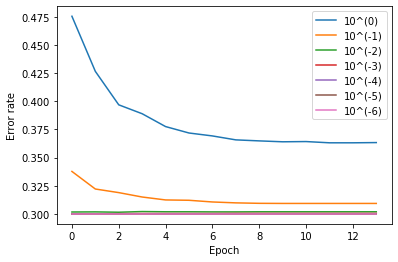

In [22]:
import numpy as np

for i in range(len(accs)):
    acc = accs[i]
    plt.plot(1 - np.array(acc), label=f"10^({-i})")

plt.xlabel("Epoch")
plt.ylabel("Error rate")
plt.legend()
plt.show()